In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Данные

Для анализа были выбраны три датасета с товарами с маркетплейсов или из магазинов. Два из них про электронику, один охватывает куда больше категорий.
Это делалось для того, чтобы примерно по одной и той же теме были и похожие, и очень разные датасеты, чтобы мы могли эффективно их сравнить и исследовать.

Первый датасет - товары с маркетплейса Amazon:

https://www.kaggle.com/datasets/promptcloud/amazon-product-dataset-2020

Второй датасет - данные о продажах телефонов на маркетплейсах:

https://www.kaggle.com/datasets/kurniakh/marketplace-data

Третий датасет - информация о товарах из раздела электроники и их ценах (неизвестный маркетплейс или магазин, я не смогла найти его название):

https://data.world/datafiniti/electronic-products-and-pricing-data


\

Скачаем все датасеты и посмотрим на каждый из них.


In [ ]:
# первый - amazon product dataset
data1 = pd.read_csv('/content/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv')

# второй - marketplace electronic data sales
data2 = pd.read_csv('/content/marketplace.csv')

# третий - electronic products and pricing data
data3 = pd.read_csv('/content/DatafinitiElectronicsProductsPricingData.csv')

## Изучаем первый датасет

In [ ]:
data1.head(2)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [ ]:
data1.shape

(10002, 28)

In [ ]:
data1.isnull().sum()

Uniq Id                      0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64

Датасет не предобработан. Колонки следует переименовать так, чтобы к ним можно было удобно обращаться через точку.
Но перед этим удалим колонки, в которых нет ни одного значения.
Это колонки `Brand Name`, `Asin`, `List Price`, `Quantity`, `Sku`, `Stock`, `Product Details`, `Dimensions`, `Color`, `Ingredients`, `Direction To Use`, `Size Quantity Variant`, `Product Description`. Можно даже не разбираться, что они значат, хотя по названию многих это можно однозначно определить.

In [ ]:
columns_to_remove = [
    'Brand Name', 'Asin', 'List Price', 'Quantity', 'Sku', 'Stock',
    'Product Details', 'Dimensions', 'Color', 'Ingredients',
    'Direction To Use', 'Size Quantity Variant', 'Product Description'
]

data1.drop(columns=columns_to_remove, inplace=True, errors='ignore')

data1.columns = [col.replace(' ', '_').lower() for col in data1.columns]

In [ ]:
data1.head(2)

,uniq_id,product_name,category,upc_ean_code,selling_price,model_number,about_product,product_specification,technical_details,shipping_weight,product_dimensions,image,variants,product_url,is_amazon_seller
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",Sports & Outdoors | Outdoor Recreation | Skate...,NaN,$237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",Toys & Games | Learning & Education | Science ...,NaN,$99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,Y


In [ ]:
data1.shape

(10002, 15)

Мы удалили почти половину колонок, остальные трогать не будем, так как там может быть важная информация.
Изучим оставшиеся данные.

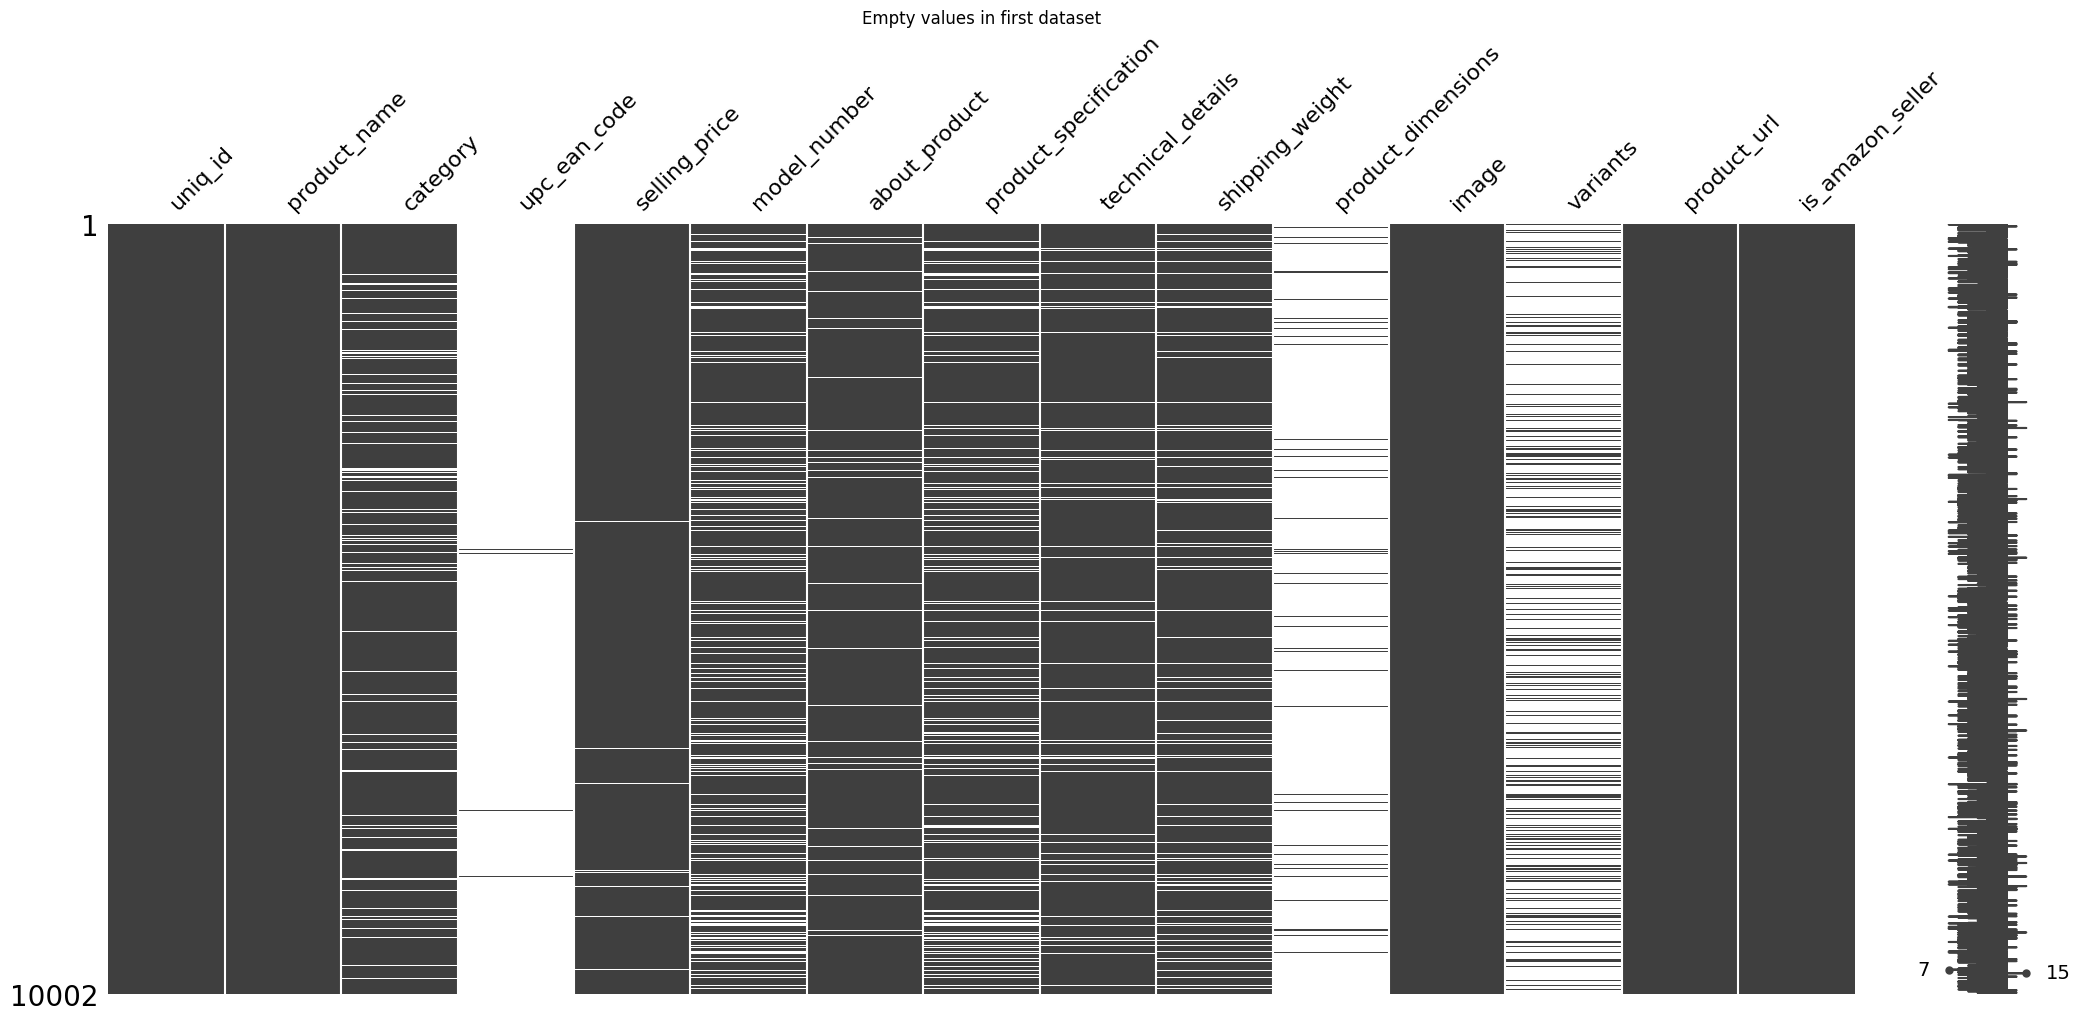

In [ ]:
msno.matrix(data1)
plt.title('Empty values in first dataset')
plt.show()

In [ ]:
data1.dtypes

uniq_id                  object
product_name             object
category                 object
upc_ean_code             object
selling_price            object
model_number             object
about_product            object
product_specification    object
technical_details        object
shipping_weight          object
product_dimensions       object
image                    object
variants                 object
product_url              object
is_amazon_seller         object
dtype: object

In [ ]:
for col in data1.columns:
  print(col, data1[col].nunique())

uniq_id 10002
product_name 9930
category 938
upc_ean_code 34
selling_price 3876
model_number 8109
about_product 9036
product_specification 8367
technical_details 8657
shipping_weight 837
product_dimensions 458
image 9934
variants 2445
product_url 10002
is_amazon_seller 2


In [ ]:
data1.describe()

,uniq_id,product_name,category,upc_ean_code,selling_price,model_number,about_product,product_specification,technical_details,shipping_weight,product_dimensions,image,variants,product_url,is_amazon_seller
count,10002,10002,9172,34,9895,8230,9729,8370,9212,8864,479,10002,2478,10002,10002
unique,10002,9930,938,34,3876,8109,9036,8367,8657,837,458,9934,2445,10002,2
top,4c69b61db1fc16e7013b43fc926e502d,Btswim NFL Pool Noodles (Pack of 3),Toys & Games | Games & Accessories | Board Games,071444764117 735533033354,$19.99,-,Hand Wash in Cold Water. | Line Dry. | No Bleach.,Shipping Information: View shipping rates and ...,Go to your orders and start the return Select ...,1 pounds,4.9 x 21.8 x 14.8 inches,https://m.media-amazon.com/images/I/A13usaonut...,https://www.amazon.com/Wildkin-Insulated-Moist...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y
freq,1,4,284,1,233,35,23,2,363,408,4,16,3,1,9723


Датасет является некоторой базой товаров, здесь главная единица для анализа - конкретный товар. Содержится большое количество полезных характеристик, а также цена.

Этими данными можно воспользоваться для анализа ценообразования (например, для понимания, какой признак насколько сильно влияет на цену или для предсказания этой самой цены - может быть важно для продавцов, которые хотят выставлять свои товары на маркетплейсе, и им нужно понимать, по какой цене продавать товар). На них можно сделать качественный EDA, который будет нести много полезной информации, данные подходят для обучения регрессионной модели для предсказаний стоимости товара.
Также датасет поможет в рекомендательных системах - есть несколько признаков, по которым можно выделять похожие товары.
Поможет организовать грамотное хранение на складе, доставку и взаимодействие с продавцами (за счёт наличия информации о размерах и других важных признаков).

\

Тем не менее, такие данные не содержат информации о покупках пользователей, и по ним не получится спрогнозировать спрос на тот или иной товар, оценить поведение пользователей и получение прибыли.

## Изучаем второй датасет

In [ ]:
data2.head(2)

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2


In [ ]:
data2.shape

(26014, 16)

In [ ]:
data2.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [ ]:
data2.dtypes

date               object
sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [ ]:
for col in data2.columns:
  print(col, data2[col].nunique())

date 41
sku_name 11397
product_id 12120
merchant_code 4094
merchant_badge 3
product_type 361
merchant_city 136
cod 2
price 3224
stock 799
daily_gmv 2760
daily_sold 137
daily_view 909
rating 30
total_review 558
total_sold 1267


Этот датасет значительно чище предыдущего. Нам не нужно удалять колонки, не нужно их переименовывать. Здесь даже есть типы данных.

Этот датасет представляет из себя данные о продажах товаров. Он не похож на предыдущий, который является, скорее всего, некоторой базой товаров на маркетплейсе.

В таком случае, этот датасет подходит для задач, связанных с анализом временных рядов. Он содержит данные о продажах, ранжированные по времени, на нём можно обучать модели, предсказывающие рост или падение прибыли, спрос на определённые товары. Возможно, эти данные помогут в задачах ранжирования, так как по ним можно каким-то образом делать выводы о популярности товаров, сравнивать её и понимать, что предложить первым.

\

Однако, датасет не содержит никакой информации о пользователях или признаках товара, что не позволяет использовать его в рекомендательных системах. Также по нему нельзя предсказывать стоимость товаров, так как о них нет никакой информации, которая как-либо коррелирует с ценой.


## Изучаем третий датасет

In [ ]:
data3.head(2)

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


In [ ]:
data3.shape

(7249, 31)

In [ ]:
data3.isnull().sum()

id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                    5706
imageURLs                 0
keys                      0
manufacturer           4014
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
Unnamed: 26            7210
Unnamed: 27            7231
Unnamed: 28            7243
Unnamed: 29            7237
Unnamed: 30            7243
dtype: int64

Колонки без названия можно сразу удалять - в них слишком мало значений, чтобы попытаться по ним восстановить имена и смысл столбцов.

Также немного переименуем колонки, чтобы не путаться в prices и точках и чтобы видеть перед собой привычный snake_case.

In [ ]:
data3 = data3.drop(columns=['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'])

In [ ]:
data3 = data3.rename(columns={
    'prices.amountMax' : 'max_price',
    'prices.amountMin' : 'min_price',
    'prices.availability' : 'availability',
    'prices.condition' : 'condition',
    'prices.currency' : 'currency',
    'prices.dateSeen' : 'date_seen',
    'prices.isSale' : 'is_sale',
    'prices.merchant' : 'merchant',
    'prices.shipping' : 'shipping',
    'prices.sourceURLs' : 'source_URLs',
    'dateAdded' : 'date_added',
    'dateUpdated' : 'date_updated',
    'imageURLs' : 'image_URLs',
    'manufacturerNumber' : 'manufacturer_number',
    'primaryCategories' : 'primary_categories',
    'sourceURLs' : 'source_URLs'
    })

In [ ]:
data3.shape

(7249, 26)

In [ ]:
data3.dtypes

id                      object
max_price              float64
min_price              float64
availability            object
condition               object
currency                object
date_seen               object
is_sale                   bool
merchant                object
shipping                object
source_URLs             object
asins                   object
brand                   object
categories              object
date_added              object
date_updated            object
ean                     object
image_URLs              object
keys                    object
manufacturer            object
manufacturer_number     object
name                    object
primary_categories      object
source_URLs             object
upc                     object
weight                  object
dtype: object

# Анализ и проверка гипотез

Для проверки гипотез мы выбрали второй датасет - с данными о смартфонах на маркетплейсе.

Датасет содержит информацию о транзакциях на маркетплейсе со смартфонами: купленная модель, стоимость, город-поставщик, возможность оплаты наличными, цена, количество на складе, а также количество таких же телефонов, проданных за день и за всё время.

Данные собирались в период с 11 марта по 30 апреля 2020 года.

In [ ]:
data2 = pd.read_csv('/content/marketplace.csv')

In [ ]:
data2.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


## Немного анализа

Кажется, для понимания данных наиболее важными предположениями являются предположения о распределении различных переменных.

Займёмся сначала этим.

Подумаем, какие гипотезы тут можно было бы выдвинуть на основе данных, их типов и значений. Сделаем небольшой EDA исключительно для изучения возможных значений.

In [ ]:
data2.dtypes

date               object
sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

Первая же переменная в датасете – дата. По ней можно понимать динамику продаж определённых товаров, можно следить за изменением каких-либо показателей со временем.

Есть несколько числовых переменных, таких как цена, количество товаров на складе, а также всевозможные количества продаж, рейтинги и так далее.

Есть также категориальные переменные: город, тип продукта, номер магазина и прочие. Некоторые из них содержат столько разных значений, что целесообразнее будет превратить их в числовые.

In [ ]:
data2.shape

(26014, 16)

In [ ]:
data2.nunique()

date                 41
sku_name          11397
product_id        12120
merchant_code      4094
merchant_badge        3
product_type        361
merchant_city       136
cod                   2
price              3224
stock               799
daily_gmv          2760
daily_sold          137
daily_view          909
rating               30
total_review        558
total_sold         1267
dtype: int64

Переменные можно поделить на следующие группы по важности для решения различных задач:

1. Основные характеристики транзакции (наиболее важные):

   - product_id: Идентификатор продукта (с высокой вероятностью мы не будем его использовать в гипотезах, по крайней мере, он сам по себе интереса не представляет)

   - price: Цена продукта. Ключевой фактор, влияющий на доходы и выбор покупателя

   - daily_sold: Количество проданных единиц в день. Показатель спроса и популярности товара

   - total_sold: Общее количество проданных единиц. Важный показатель для анализа общего успеха продукта


2. Метрики эффективности продаж:

   - daily_gmv: Общая стоимость проданных товаров за день (Gross Merchandise Volume). Показывает объем продаж за определенный период

   - stock: Количество товара на складе. Важно для управления запасами и планирования закупок

   - daily_view: Количество просмотров товара в день. Может быть индикатором интереса к продукту

3. Обратная связь от клиентов:

   - rating: Средний рейтинг продукта. Отражает удовлетворенность покупателей

   - total_review: Общее количество отзывов. Помогает оценить вовлеченность покупателей и их отзывы о продукте


4. Информация о продавце и товаре:
   - sku_name: Название товара. Важно для идентификации и категоризации товаров (мы его вряд ли будем использовать, так как есть более простые для анализа колонки)

   - merchant_code: Уникальный код продавца. Важен для анализа продаж на уровне продавцов

   - merchant_badge: Категория продавца (Power Merchant, Regular Merchant, Official Store). Может влиять на доверие покупателей и продажи

   - product_type: Более широкое, чем наименование (серия? марка?)

   - merchant_city: Город продавца. Может быть использован для географического анализа


5. Второстепенная информация:
   - date: Дата транзакции. Важна для временного анализа, но часто не имеет прямого влияния на продажи

   - cod: Наличие опции оплаты наличными после получения. Может влиять на предпочтения и выбор покупателя


Исходя из этих соображений будем сортировать гипотезы в порядке возрастания, но сначала немного преобразуем датасет.


In [ ]:
data2['date'] = pd.to_datetime(data2['date'], format='%m/%d/%Y')

## Гипотеза 1. О корреляции между ценой и количеством товара
Есть положительная корреляция между ценой и количеством продукта в наличии (то есть чем дороже товар, тем неохотнее его покупают, и тем больше залёживается на складе).

Можно было бы исследовать отдельно распределение цены и оставшихся на складе товаров, но целесообразнее выдвинуть такую гипотезу и в процессе посмотреть на распределения.

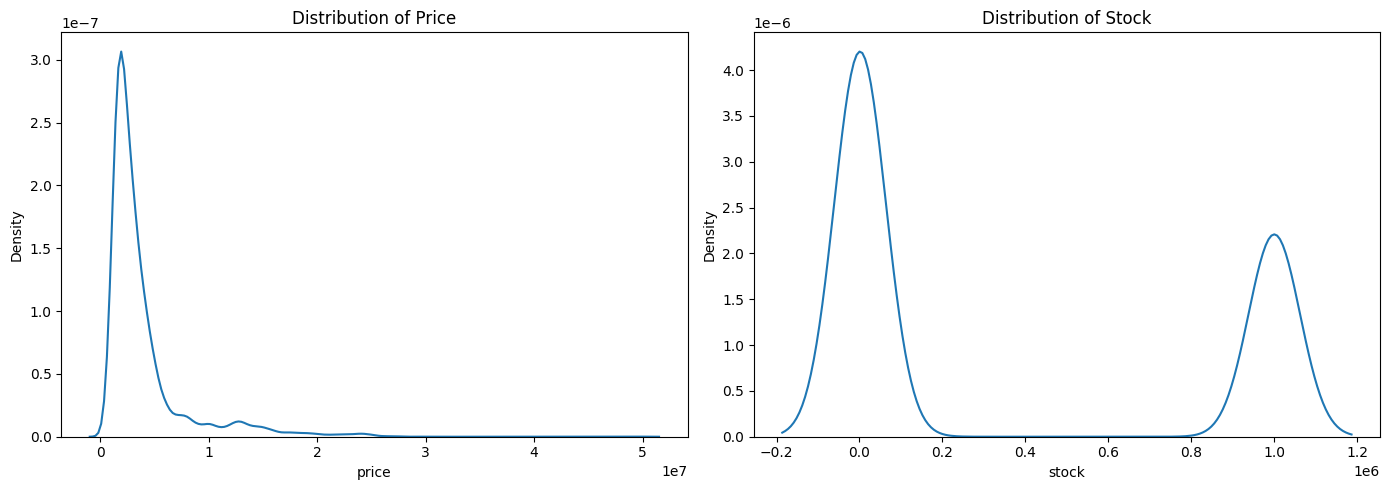

In [ ]:
# Распределения цены и стока
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

plot_0 = sns.kdeplot(x='price', data=data2, ax=axs[0])
axs[0].set_title('Distribution of Price')


plot_1 = sns.kdeplot(x='stock', data=data2, ax=axs[1])
axs[1].set_title('Distribution of Stock')


plt.tight_layout()
plt.show()

В ценах ничего необычного – дешёвых много, дорогих мало. А сток распределён интересно – два пика, один на очень маленьких значениях (в нуле – значит ли это, что большинства товаров нет в наличии?) и на очень больших (видимо, эту группу товаров никто не покупает).

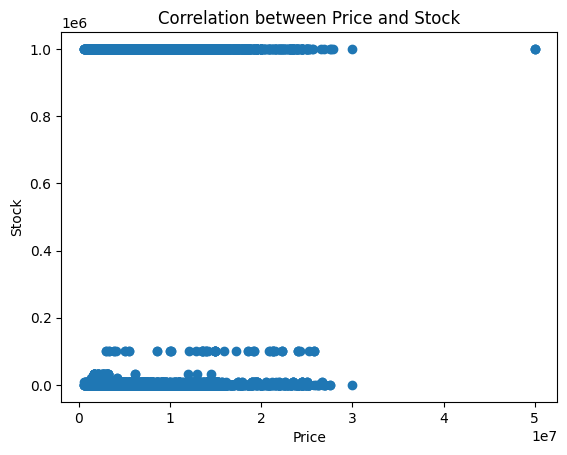

In [ ]:
plt.scatter(data2['price'], data2['stock'])
plt.title('Correlation between Price and Stock')
plt.xlabel('Price')
plt.ylabel('Stock')

plt.show()

Нет никакой зависимости между тем, сколько стоит товар, и тем, сколько его лежит на складе.

Вывод: гипотеза опровергнута.

## Гипотеза 2. О корреляции цен и покупок

Чем дороже товар, тем хуже его покупают (и в день, и вообще).

In [ ]:
total_sales_trace = go.Scatter(
    x=data2['price'],
    y=data2['total_sold'],
    mode='markers',
    name='Total Sold',
    marker=dict(color='red')
)

daily_sales_trace = go.Scatter(
    x=data2['price'],
    y=data2['daily_sold'],
    mode='markers',
    name='Daily Sold',
    marker=dict(color='blue')
)


layout = go.Layout(
    title='Price vs. Sales',
    xaxis=dict(title='Price'),
    yaxis=dict(title='Units Sold'),
    showlegend=True
)

fig = go.Figure(data=[total_sales_trace, daily_sales_trace], layout=layout)

fig.show()

Невооружённым глазом видно, что для красных точек (для продаж за всё время) всё так, как мы и предположили. Если график приблизить, для синих то же самое (возможно, чуть менее выраженно, но видно, что дорогих товаров в день продаётся меньше).


Вывод: гипотеза подтверждена.

## Гипотеза 3. О корреляции между просмотрами и продажами

Чем больше товар просматривают, тем лучше он продаётся.

Для проверки этой гипотезы можно понаблюдать за параметрами, такими как продажи товара в день, за всё время, а также за GMV (что, впрочем, не столько говорит о продажах, сколько о прибыли, поэтому не даст много информации для этой гипотезы).

Построим график зависимости между просмотрами и продажами за день (так как GMV представлен только за день).

In [ ]:
fig = px.scatter(data2, x='daily_view', y='daily_sold', title='Daily Views vs Daily Sales',
                 labels={'daily_view': 'Daily Views', 'daily_sold': 'Daily Sales'})

fig.show()

График показывает, что товары с большинством просмотров покупают средне, тогда как товары с высокими и низкими продажами смотрят меньше.

Вывод: гипотеза опровергнута.

## Гипотеза 4. О влиянии цены на прибыль

На товарах с ценой ближе к средней (не слишком низкой и не слишком высокой) зарабатывают больше всего.

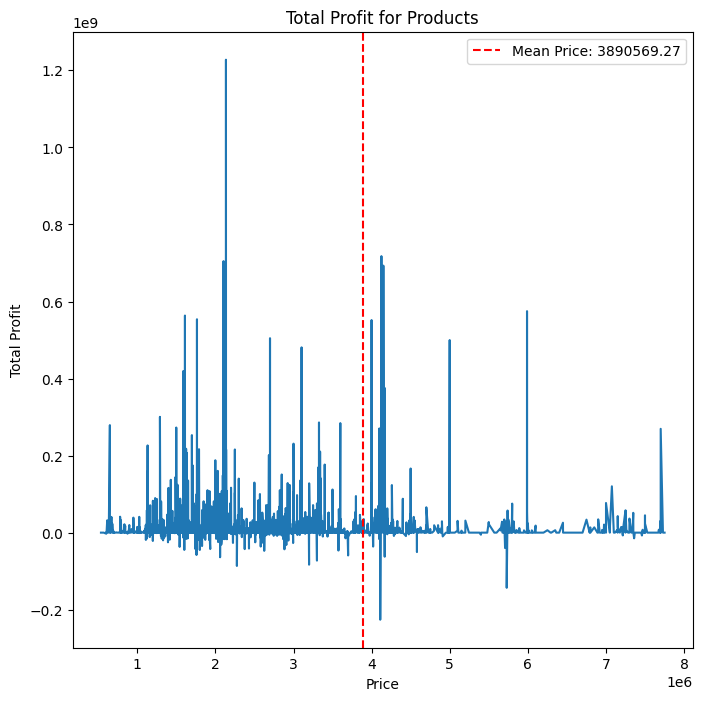

In [ ]:
df_mean_price = data2['price'].mean()
df_std_price = data2['price'].std()

mask = (data2['price'] >= (df_mean_price - df_std_price)) & (data2['price'] <= (df_mean_price + df_std_price))
data_close_to_mean = data2[mask]

profit_per_price = data_close_to_mean.groupby('price')['daily_gmv'].sum().reset_index()

sorted_profit = profit_per_price.sort_values('price')

plt.figure(figsize=(8, 8))
sns.lineplot(data=sorted_profit, x='price', y='daily_gmv')
plt.axvline(df_mean_price, color='r', linestyle='--', label=f'Mean Price: {df_mean_price:.2f}')
plt.xlabel('Price')
plt.ylabel('Total Profit')
plt.title('Total Profit for Products')
plt.legend()
plt.show()


На графике видно, что пик прибыли находится ближе к низким ценам, чем к средним. Из этого делаем вывод, что больше прибыли в среднем приносят бюджетные (но не самые дешёвые) телефоны.

Вывод: гипотеза не подтвердилась.

## Гипотеза 5. О городах-лидерах продаж

Треть (33%) или более трети товаров на маркетплейсе поставляются двумя городами.

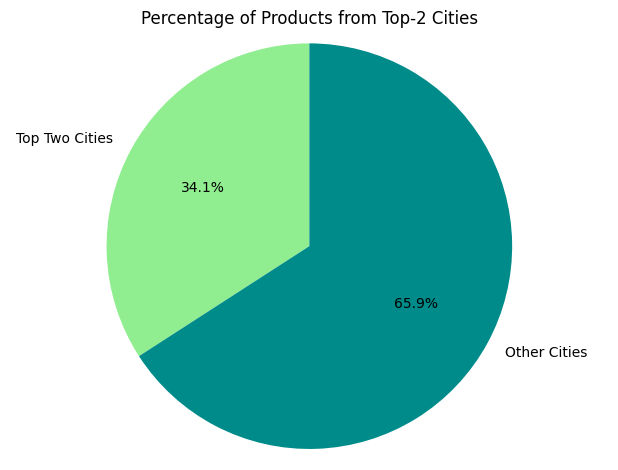

In [ ]:
merchant_city_counts = data2['merchant_city'].value_counts()

top_two = merchant_city_counts.iloc[:2].sum()
others = merchant_city_counts.iloc[2:].sum()

pie_data = [top_two, others]
labels = ['Top Two Cities', 'Other Cities']
colors = ['lightgreen', 'darkcyan']

fig1, ax1 = plt.subplots()
ax1.pie(pie_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Products from Top-2 Cities')

ax1.axis('equal')
plt.tight_layout()
plt.show()


Вывод: Гипотеза подтвердилась.

In [ ]:
# два самых популярных города
merchant_city_counts[:2]

merchant_city
Kota Administrasi Jakarta Barat    4676
Kota Administrasi Jakarta Pusat    4201
Name: count, dtype: int64

In [ ]:
# общее количество городов
merchant_city_counts.shape[0]

136

Из результатов проверки гипотезы могут последовать размышления о распределении импакта городов в продажи.

Мы доказали, что два самых популярных города покрывают треть продаж, а всего городов довольно много – 136. Почему бы им не быть распределёнными экспоненциально? (хотя бы потому, что экспоненциальное распределение непрерывно, а наше явно дискретное, но мы можем рассуждать об определённом приближении)

## Гипотеза 6. О распределении городов продавцов

Распределение количества продаваемых городами товаров близко к экспоненциальному (с точностью до дискретности и непрерывности).

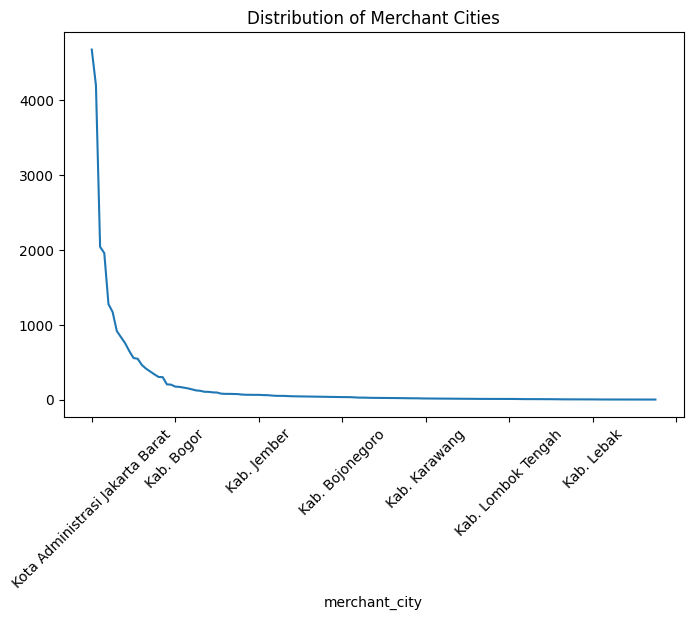

In [ ]:
plt.figure(figsize=(8, 5))
merchant_city_counts.plot()
plt.title('Distribution of Merchant Cities')
plt.xticks(rotation=45)
plt.show()

По своему импакту в продажи города распределены почти экспоненциально.

Вывод: гипотеза подтвердилась.

## Гипотеза 7. О соотношении покупок и запасов

Товары с меньшим количеством экземпляров на складе охотнее покупают (возможно, из-за восприятия их редкими или востребованными, или экземпляро на складе мало потому что скупают)

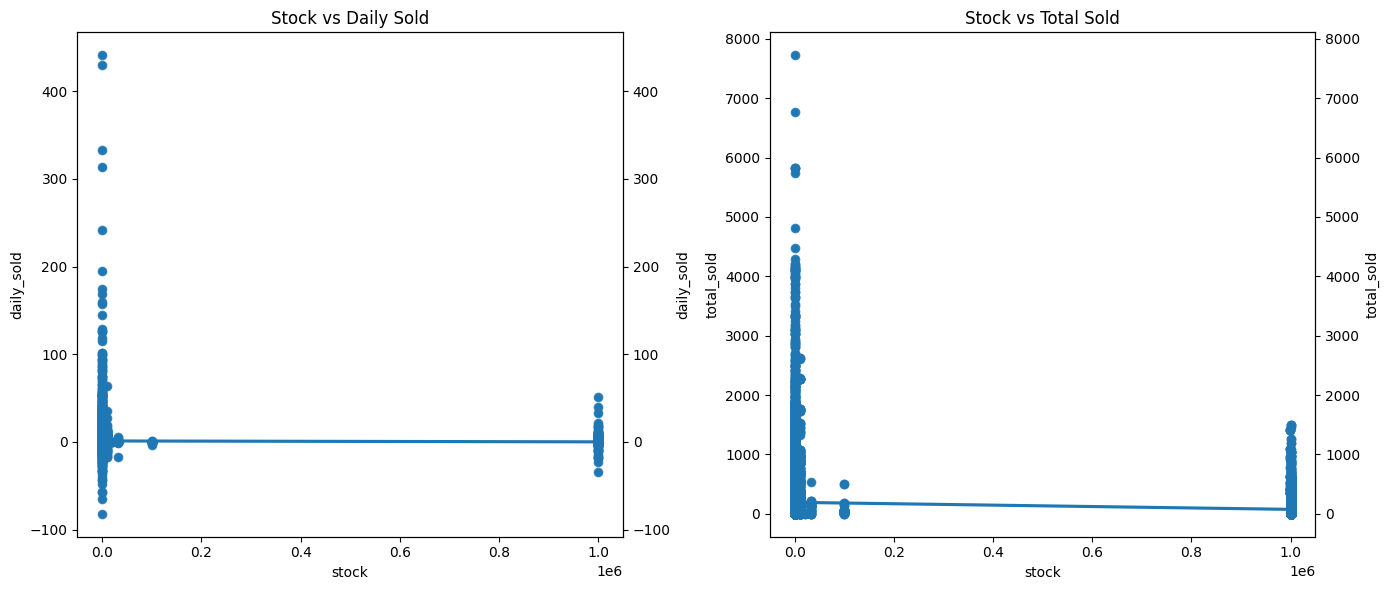

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='stock', y='daily_sold', data=data2, ax=axs[0])
sns.regplot(x='stock', y='daily_sold', data=data2, ax=axs[0].twinx())
axs[0].set_title('Stock vs Daily Sold')
sns.scatterplot(x='stock', y='total_sold', data=data2, ax=axs[1])
sns.regplot(x='stock', y='total_sold', data=data2, ax=axs[1].twinx())
axs[1].set_title('Stock vs Total Sold')

plt.tight_layout()
plt.show()

Пики продаж находятся примерно на одном уровне среди товаров, которых мало и много, но среди тех, которых осталось мало, гораздо больше товаров, которые куплены много раз. Так что можно считать, что гипотеза верна.

Вывод: гипотеза подтвердилась.

При проверке этой гипотезы возникла аналогичная – про соотношение просмотров и запасов.

## Гипотеза 8. О соотношении просмотров и запасов

Товары, которых осталось мало, больше просматривают.

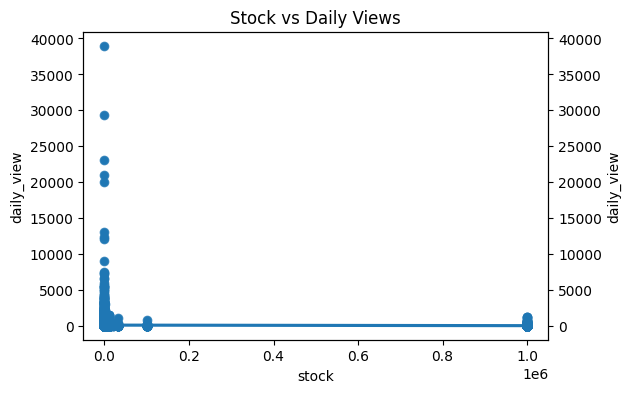

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(x='stock', y='daily_view', data=data2, ax=ax)
sns.regplot(x='stock', y='daily_view', data=data2, ax=ax.twinx())
ax.set_title('Stock vs Daily Views')

plt.show()

Есть ощущение, что никто вообще не смотрит товары, если их осталось много.
Больше просмотров у тех товаров, которых мало.

Вывод: гипотеза подтвердилась.

## Гипотеза 9. О марках-лидерах продаж

Xiaomi, Huawei и Samsung входят в топ-5 популярных марок на этом маркетплейсе.

In [ ]:
data2['brand'] = data2['product_type'].str.lower().str.split().str[0]

In [ ]:
data2['brand'].nunique()

11

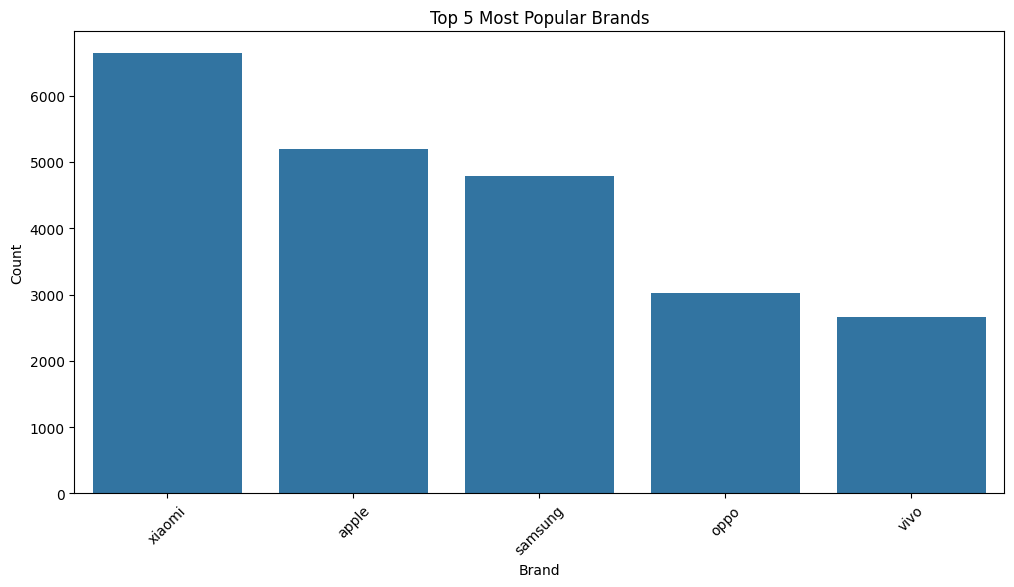

In [ ]:
brand_counts = data2['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_counts.head(5), x='brand', y='count')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 5 Most Popular Brands')
plt.show()


Два из трёх заявленных брендов попали в топ-5 самых популярных.

Вывод: гипотеза почти подтвердилась.

## Гипотеза 10. О популярности бренда Apple

Техника Apple пользуется популярностью среди покупателей (занимает более 15% всех продаж)

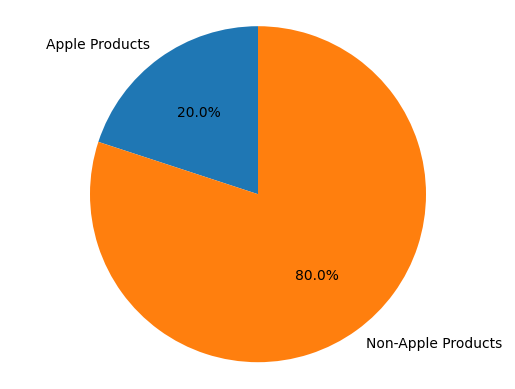

In [ ]:
apple_sales = data2['product_type'].str.contains('Apple').sum()
non_apple_sales = len(data2) - apple_sales

labels = 'Apple Products', 'Non-Apple Products'
sizes = [apple_sales, non_apple_sales]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

Техника Apple занимает ровно (с какой-то точностью) пятую часть всех проданных телефонов, что довольно неплохо.

Вывод: гипотеза подтвердилась

## Гипотеза 11. О соотношении брендов и цен

Техника Apple в среднем самая дорогая, а Xiaomi – самая дешёвая.

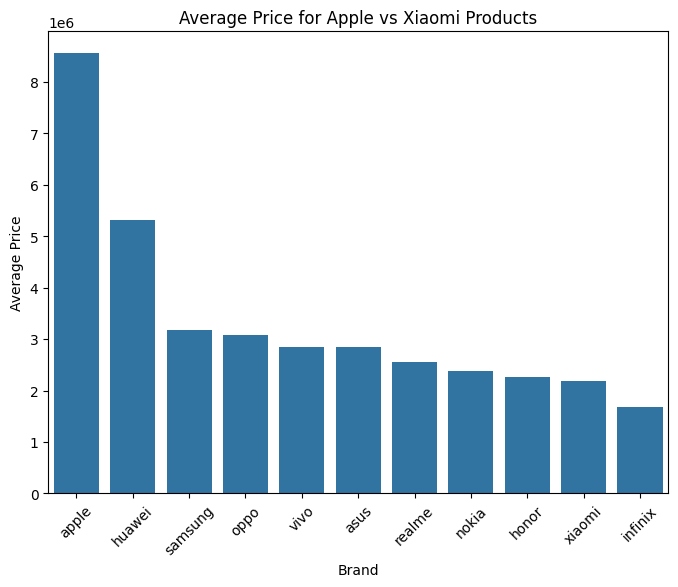

In [ ]:
grouped_data = data2.groupby('brand')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='brand', y='price', data=grouped_data)
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price for Apple vs Xiaomi Products')
plt.show()

Apple в среднем действительно самая дорогая (причём достаточно сильно выделяется средней ценой на фоне остальных), а Xiaomi – одна из самых дешёвых, но есть бренды, где средняя цена меньше.

Вывод: гипотеза почти подтвердилась.

## Гипотеза 12. О самом дорогом товаре

Самый дорогой товар, купленный на маркетплейсе – айфон.

<ipython-input-16-95d90999ed4e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(top10_expensive['sku_name'])


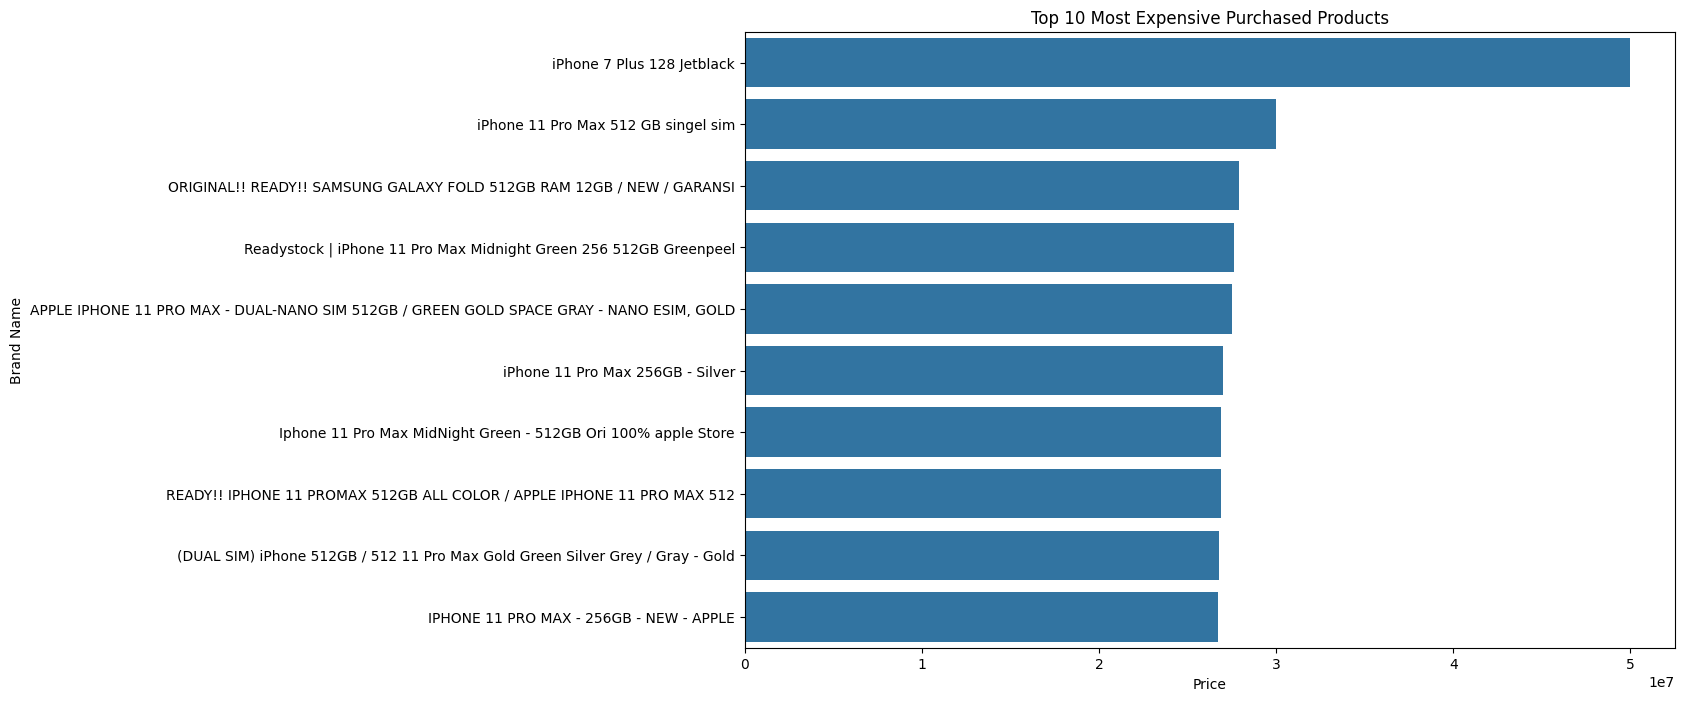

In [ ]:
top10_expensive = data2.drop_duplicates(subset=['price']).nlargest(10, 'price')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price', y='sku_name', data=top10_expensive)
plt.title('Top 10 Most Expensive Purchased Products')
plt.xlabel('Price')
ax.set_yticklabels(top10_expensive['sku_name'])
plt.ylabel('Brand Name')
plt.show()

In [ ]:
top10_expensive.sort_values(ascending=False, by='price').head(1)['product_type']

2216    Apple iPhone 7 Plus
Name: product_type, dtype: object

Самый дорогой товар – действительно айфон. Кстати, в топ-10 дорогих товаров техника Apple попала целых 9 раз.

Вывод: гипотеза подтвердилась.

## Гипотеза 13. О влиянии типов продавцов (PM, RM, OS) на продажи

Покупатели покупают технику преимущественно из официальных магазинов, а на последнем месте в количестве продаж Regular Merchants.

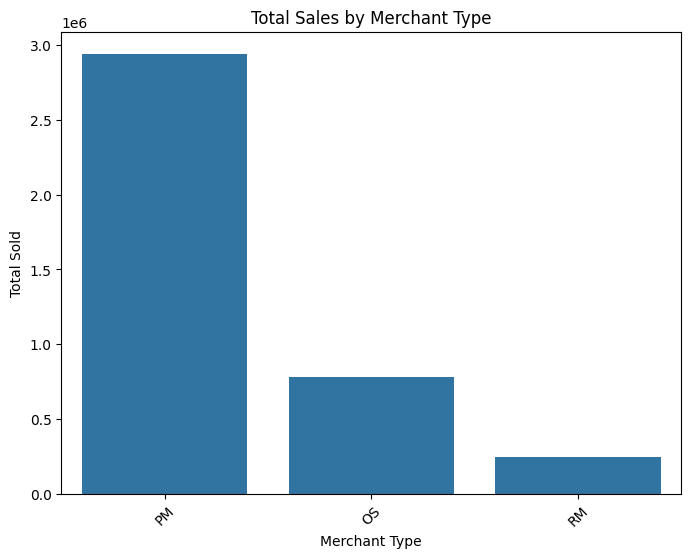

In [ ]:
merchant_sales = data2.groupby('merchant_badge')['total_sold'].sum().reset_index()

sorted_sales = merchant_sales.sort_values('total_sold', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='merchant_badge', y='total_sold', data=sorted_sales)
plt.xticks(rotation=45)
plt.xlabel('Merchant Type')
plt.ylabel('Total Sold')
plt.title('Total Sales by Merchant Type')
plt.show()

Мы оказались не правы. Гораздо больше, чем у магазинов, покупают у Power Merchants (ситуация может быть вызвана и тем, что официальные магазины не продают свои товары через этот маркетплейс, тогда гипотеза не совсем релевантна, но этого узнать мы не можем).

Вывод: гипотеза опровергнута.

Результат наталкивает на гипотезы о ценах в зависимости от типов продавцов. Наверняка спрос и цена связаны друг с другом, и здесь играет роль не только доверие, но и стоимость.

## Гипотеза 14. О влиянии типов продавцов на цены

Regular Merchants продают товары дороже всех, а Official Stor-ы – дешевле всех.



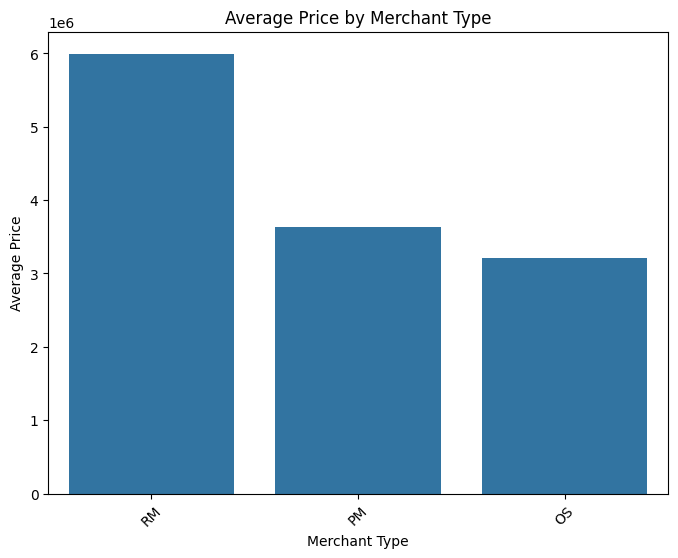

In [ ]:
grouped_data = data2.groupby('merchant_badge')['price'].mean().reset_index()

sorted_data = grouped_data.sort_values('price', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='merchant_badge', y='price', data=sorted_data)
plt.xticks(rotation=45)
plt.xlabel('Merchant Type')
plt.ylabel('Average Price')
plt.title('Average Price by Merchant Type')
plt.show()

Всё именно так, как мы предположили. Это связано, скорее всего, с тем, что продавцам, чтобы продать товар какого-то бренда, нужно его сначала купить, а затем перепродать (дороже, естественно, иначе зачем им этим заниматься).

Вывод: гипотеза подтвердилась.

## Гипотеза 15. О доступности оплаты после получения

Для большинства заказов доступна оплата наличными при получении заказа.



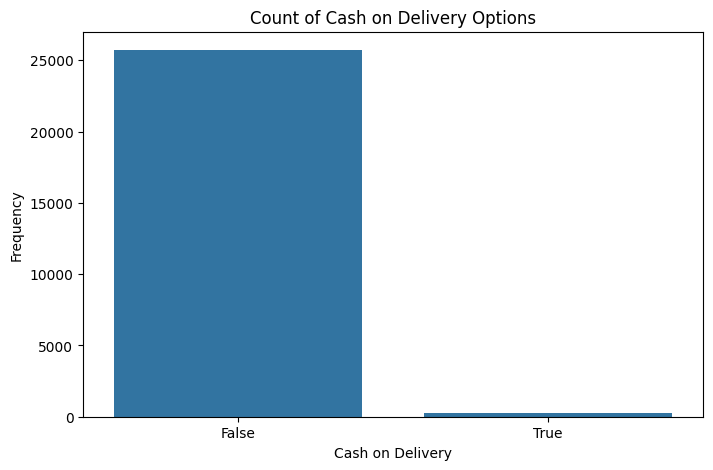

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cod', data=data2)
plt.title('Count of Cash on Delivery Options')
plt.xlabel('Cash on Delivery')
plt.ylabel('Frequency')
plt.show()


Почти нигде нет возможности оплатить после получения (как грубо).

Вывод: гипотеза опровергнута.

## Гипотеза 16. О динамике количества покупок с течением времени

С течением времени на маркетплейсе покупают больше.

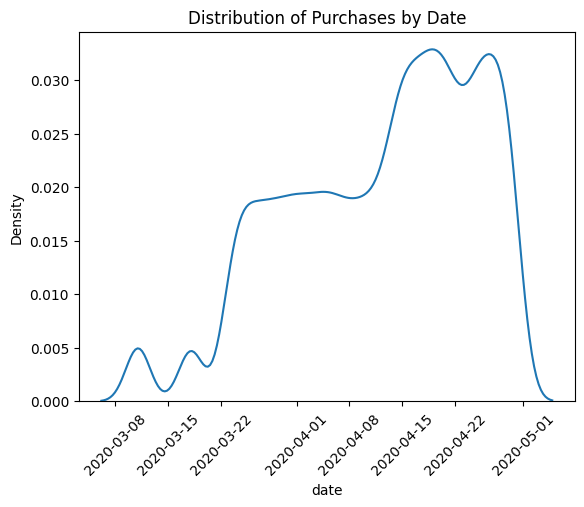

In [ ]:
sns.kdeplot(data=data2, x='date')
plt.xticks(rotation=45)
plt.title('Distribution of Purchases by Date')

plt.show()

На графике довольно много локальных максимумов и минимумов, но число покупок со временем растёт.
Это может быть связано либо с тем, что собранные данные описывают самое начало работы маркетплейса, либо с тем, что как раз именно в то время люди наиболее сильно боялись коронавируса, и по всему миру объявлялись карантины (тогда ещё и становится понятно, почему так неохотно разрешается оплата наличными).

Вывод: гипотеза подтвердилась.

# Выводы

Имея датасет с покупками телефонов (или чего угодно другого) на маркетплейсе, можно проверить достаточно много предположений о динамике продаж, спросе (и что на него влияет), прибыли, доверии пользователей.

Используя эти данные, бизнес может принимать более взвешенные решения по управлению своими товарами, чтобы максимизировать прибыль.